In [2]:
import numpy as np
from numpy import cos, sin, sqrt
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import Axes3D

/Users/chhyeok/Documents/anaconda3_envs/Env_cloud/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


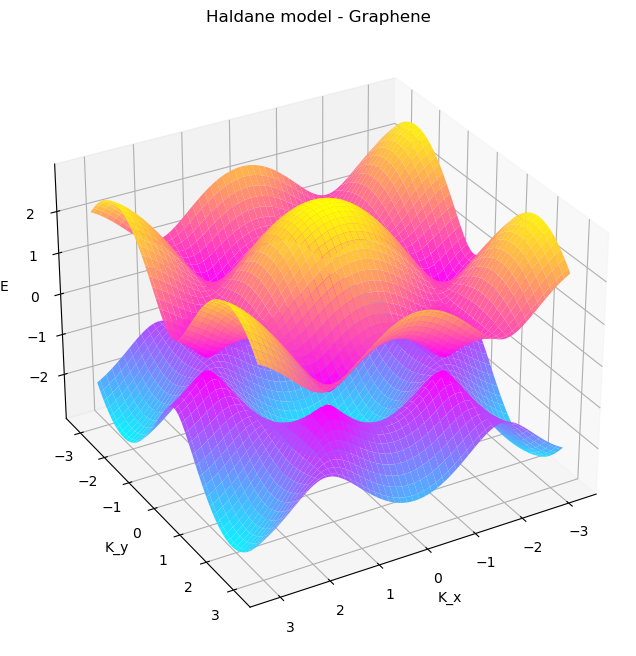

In [3]:
M = 0
t1 = 1
t2 = 0.1
phi = np.pi/2
# kx = np.linspace(-0*np.pi, 2.5*np.pi, 100)
# ky = np.linspace(-2*np.pi, 2*np.pi, 100)
kx = np.linspace(-np.pi, np.pi, 100)
ky = np.linspace(-np.pi, np.pi, 100)
KX, KY = np.meshgrid(kx, ky)

a = [0] #a[0]
a.append(np.array([sqrt(3)/2,1/2]))  #a[1]
a.append(np.array([-sqrt(3)/2,1/2])) #a[2]
a.append(np.array([0,-1]))           #a[3]
b = [0]
b.append(np.array([-sqrt(3)/2,3/2]))
b.append(np.array([-sqrt(3)/2,-3/2]))
b.append(np.array([-sqrt(3),0]))

#pauli
sig_0 = np.array([[1,0],[0,1]])
sig_x = np.array([[0,1],[1,0]])
sig_y = np.array([[0,-1j],[1j,0]])
sig_z = np.array([[1,0],[0,-1]])



n=2
eigenvalues = np.zeros((n, len(kx), len(ky)), dtype=complex)

for i in range(len(ky)):
    for j in range(len(kx)):
        h_0, h_x, h_y, h_z = 0, 0, 0, 0
        for k in range(1,4):
            h_0 += 2*t2*cos(phi)*(cos(kx[i]*b[k][0]+ky[j]*b[k][1]))
            h_x += t1*(cos(kx[i]*a[k][0]+ky[j]*a[k][1]))
            h_y += -t1*(sin(kx[i]*a[k][0]+ky[j]*a[k][1]))
            h_z += M + 2*t2*sin(phi)*(sin(kx[i]*b[k][0]+ky[j]*b[k][1]))
        H = sig_0*h_0 + sig_x*h_x + sig_y*h_y + sig_z*h_z
        eigenvalues[:, j, i],_ = np.linalg.eigh(H)

fig = mp.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(KX, KY, eigenvalues[0, :, :], cmap= 'cool')
ax.plot_surface(KX, KY, eigenvalues[1, :, :], cmap='spring')
ax.set_xlabel('K_x')
ax.set_ylabel('K_y')
ax.set_zlabel('E')
ax.view_init(30,60)
mp.title('Haldane model - Graphene')
mp.show()


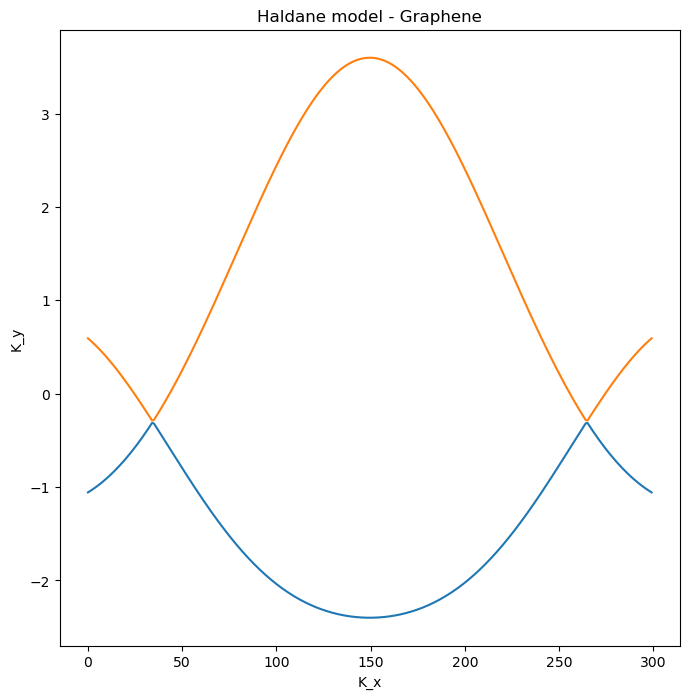

In [5]:
M = 0
t1 = 1
t2 = 0.1
phi = 0
kx = np.linspace(-np.pi, np.pi, 300)
ky = 0

a = [0] #a[0]
a.append(np.array([sqrt(3)/2,1/2]))  #a[1]
a.append(np.array([-sqrt(3)/2,1/2])) #a[2]
a.append(np.array([0,-1]))           #a[3]
b = [0]
b.append(np.array([-sqrt(3)/2,3/2]))
b.append(np.array([-sqrt(3)/2,-3/2]))
b.append(np.array([-sqrt(3),0]))

#pauli
sig_0 = np.array([[1,0],[0,1]])
sig_x = np.array([[0,1],[1,0]])
sig_y = np.array([[0,-1j],[1j,0]])
sig_z = np.array([[1,0],[0,-1]])



n=2
eigenvalues = np.zeros((n, len(kx)), dtype=complex)

for i in range(len(kx)):
        h_0, h_x, h_y, h_z = 0, 0, 0, 0
        for k in range(1,4):
            h_0 += 2*t2*cos(phi)*(cos(kx[i]*b[k][0]+ky*b[k][1]))
            h_x += t1*(cos(kx[i]*a[k][0]+ky*a[k][1]))
            h_y += -t1*(sin(kx[i]*a[k][0]+ky*a[k][1]))
            h_z += M + 2*t2*sin(phi)*(sin(kx[i]*b[k][0]+ky*b[k][1]))
        H = sig_0*h_0 + sig_x*h_x + sig_y*h_y + sig_z*h_z
        eigenvalues[:, i],_ = np.linalg.eigh(H)

fig = mp.figure(figsize=(8,8))

ax = fig.add_subplot(111)
ax.plot(eigenvalues[0, :])
ax.plot(eigenvalues[1,:])
ax.set_xlabel('K_x')
ax.set_ylabel('K_y')
mp.title('Haldane model - Graphene')
mp.show()
